# Example 1

In [1]:
import jyrobot
import random

In [2]:
jyrobot.load_world()

Searching for jyrobot config files...
Directory: ./
    'experiment-01'
Directory: /home/dblank/jyrobot/jyrobot/worlds
    'duck-scribbler-no-walls'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'


In [3]:
world = jyrobot.load_world("two-scribblers")

Random seed initialized to: 2875102


In [4]:
world.watch("panel", "inline") # or "panel", "left", "right", "inline"

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

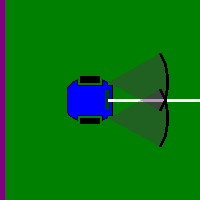

In [5]:
world.take_picture("blue", size=200)

In [6]:
world.info()

This world was loaded from '/home/dblank/jyrobot/jyrobot/worlds/two-scribblers.json'
Robots:
-------------------------
  robot[0 or 'Red']: <Robot(name='Red', position=430,50,3.14 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=90.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=-90.0, range=20, width=57.3>
  -------------------------
  robot[1 or 'Blue']: <Robot(name='Blue', position=30,50,0.0 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
  -------------------------


In [7]:
world["red"]["camera"]

<Camera size=(256,128), angle=60.0>

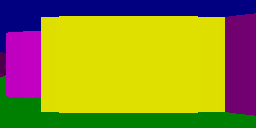

In [8]:
world["red"]["camera"].take_picture()

In [9]:
world[0].move(1, 0)
world[1].move(1, 0)

step = 0

def control(robot):
    global step
    if robot.stalled:
        robot.reverse()
        robot.turn(1 - random.random() * 2)
    if random.random() < .1:
        robot.turn(1 - random.random() * 2)
    #if step % 100 == 0:
    #    world.display(world.take_picture())
    step += 1

In [14]:
world[0].recording
#world.seconds(5, [control, control])

False

Player(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='Index:…

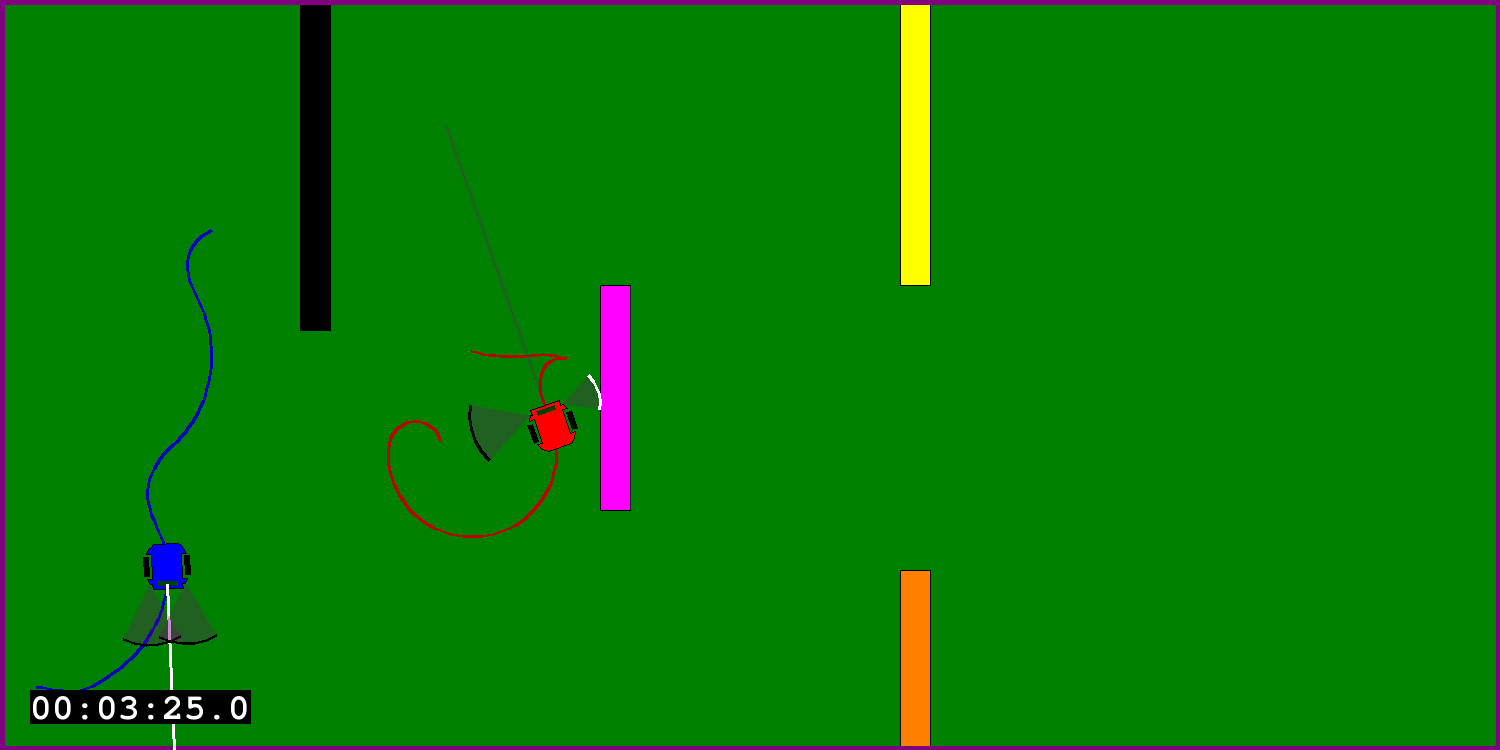

In [11]:
world.playback()

In [12]:
world.seconds(200, [control, control], show=True, real_time=False)


Simulation stopped at: 00:03:25.0; speed 38.53 x real time


In [13]:
world.seconds(200, [control, control], show=False)


Simulation stopped at: 00:06:45.0; speed 48.69 x real time


# Example 2

In [14]:
import jyrobot
import time

In [15]:
w = jyrobot.World(width=500, height=500, ground_color="white", seed=10, scale=10)
w.watch("panel", "inline")

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

In [16]:
for i in range(20):
    robot = jyrobot.Scribbler(color="blue", name="Scribby-%s" % i)
    sensor = jyrobot.Camera()
    robot.add_device(sensor)
    w.add_robot(robot)
w.draw()

In [17]:
from jyrobot.utils import Color
import random
for robot in w:
    robot.set_color( Color(
        255 * random.random(), 
        255 * random.random(), 
        255 * random.random(), 
   ))
w.draw()

In [18]:
%%time
pics = []
for robot in w:
    pic = robot["camera"].take_picture()
    pics.append(pic)

CPU times: user 3.52 s, sys: 3.65 ms, total: 3.53 s
Wall time: 3.53 s


In [22]:
jyrobot.display(*pics)

Box(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\n\x00\x00\x02\x08\x08\x06\x00\x00\…

In [23]:
%%time
pics = []
for i, robot in enumerate(w):
    pic = w.take_picture(i, size=200)
    pics.append(pic)

CPU times: user 3.87 ms, sys: 8.14 ms, total: 12 ms
Wall time: 9.78 ms


In [24]:
jyrobot.display(*pics, background_color="black")

Box(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xf2\x00\x00\x03(\x08\x06\x00\x00\x…

In [25]:
for robot in w:
    robot.move(1,0)

In [26]:
def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [27]:
w.run(control, show=True, real_time=False)


Simulation stopped at: 00:00:59.8; speed 3.85 x real time


# Example 3

In [1]:
import jyrobot as jr
import random

In [2]:
w = jr.World(width=100, height=100, scale=10)

Random seed initialized to: 7922771


In [3]:
w.watch("inline", "panel") # or "panel", "left", "right"

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

In [4]:
r = jr.Scribbler()

In [5]:
w.add_robot(r)
w.update()

In [6]:
sensor = jr.RangeSensor()

In [7]:
r.add_device(sensor)
w.update()

In [8]:
r.forward(1)

def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [9]:
r.plot(lambda robot: (robot.x, robot.world.width - robot.y), wheres=["panel"])

In [10]:
w.seconds(.1, control, show=True, real_time=True)


Simulation stopped at: 00:00:00.1; speed 0.69 x real time


In [11]:
w.seconds(10, control, show=True, real_time=True)


Simulation stopped at: 00:00:10.1; speed 0.97 x real time


In [12]:
w.run(control, show=True, real_time=True)


Simulation stopped at: 00:00:25.7; speed 0.98 x real time


In [ ]:
w.seconds(10, control, show=True, real_time=False)

In [ ]:
w.seconds(10, control, show=False)

In [13]:
r.set_pose(50, 50, 180)

In [14]:
r.set_color("purple")

In [15]:
w.update()

In [18]:
jr.display(w.take_picture())

In [5]:
jr.display("hello", wheres=["inline"])

Box(children=(Text(value='hello'),), layout=Layout(max_width='600px'))